In [6]:
import sys

sys.path.insert(0, '..')

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from random import randint
from rouge import Rouge

from main.common.common import *
from main.common.vocab import *
from main.common.simple_vocab import SimpleVocab
from main.common.util.file_util import FileUtil
from main.data.giga_world import *
from main.seq2seq import Seq2Seq

In [8]:
def show_attention_graph(article, summary, attention):
    article = article.split()
    summary = summary.split()
  
    attention = (attention[:, :-1])
    
    # figure
    figure = plt.figure(figsize=(20, 5))
    ax = figure.add_subplot(111)
    
    cax = ax.matshow(attention.numpy(), cmap='bone')
    figure.colorbar(cax)
    
    # set up axes
    ax.set_xticklabels([''] + article + ['[STOP]'], rotation=90)
    ax.set_yticklabels([''] + summary)

    # show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    plt.show()
    plt.close()
    
def get_score(summary, reference):
    summary = summary.split()
    summary = [w for w in summary if w != TK_STOP['word']]
    
    score = rouge.get_scores(' '.join(summary), reference)[0]["rouge-l"]["f"]
    
    return score

In [9]:
AppContext()

vocab = SimpleVocab(FileUtil.get_file_path(conf('vocab-file')), conf('vocab-size'))

seq2seq = cuda(Seq2Seq(vocab))

checkpoint = t.load(FileUtil.get_file_path(conf('model-file')))

seq2seq.load_state_dict(checkpoint['model_state_dict'])

seq2seq.eval()

data_loader = GigaWorldDataLoader(FileUtil.get_file_path(conf('train:article-file')), FileUtil.get_file_path(conf('train:summary-file')), 10)

2019-05-13 13:53:10 MainThread   DEBUG SimpleVocab:22 - initialize vocabulary from: /home/vivien/PycharmProjects/txt-summarization-master/data/train/giga-vocab.txt


>>> article:  at least two people were killed in a suspected bomb attack on a passenger bus in the strife-torn southern philippines on monday , the military said .
>>> reference:  at least two dead in southern philippines blast
>>> prediction:  at least two dead in southern philippines blast [STOP]
>>> score:  0.9999999999995


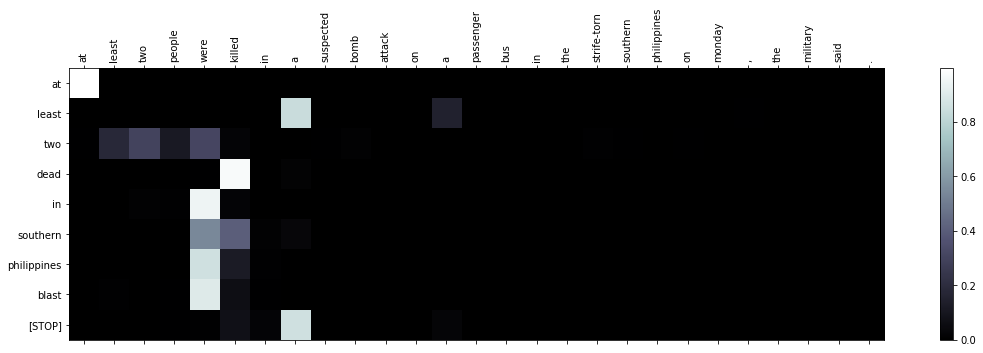

In [10]:
rouge = Rouge()

samples = data_loader.read_all()

article, reference = samples[randint(0, len(samples) - 1)]

summary, attention = seq2seq.evaluate(article)

score = get_score(summary, reference)

print('>>> article: ', article)
print('>>> reference: ', reference)
print('>>> prediction: ', summary)
print('>>> score: ', score)

show_attention_graph(article, summary, attention)